In [2]:
import matplotlib.pyplot as plt
import numpy as np

# The Philospphy of Functions

The main idea of defining a function in any programming language is to avoid having repeated pieces of code throughaout the larger code.

For instance, when we first looked at plotting we always repeated the following steps:

<ol>
    <li> Generate an x-axis </li>
    <li> From this x-axis we generated a y-axis by applying a function to the x-axis </li>
    <li> Plot the function using plt.plot </li>
</ol>

Since this operations will be repeated everytime we need to plot a function, following the philosophy of never repeating code, we will define a function that encapsulates this set of operations into a single entity, a "plot" function.

# Functions

Last time we discussed the difference between a pure function and an impure function, we said that pure functions represent the usual notion of a set of arrows between two sets, and so, pure functions simply perform a computation of any kind and then return the result. Impure functions, on the other hand, can perform actions on your computer (usually called side-effects), such as creating files, displaying a graph, playing a musical note, etc. 

In this homework we will see different examples of impure functions with different side effects.


## Plotting side effect

We discussed this side effect last time but here is a clean version of the plotting function:

In [12]:
''' A pure function that generates x-axes  '''
generate_axis = lambda start,end,numpoints : np.array([ start + (end-start)*float(i)/numpoints for i in range(numpoints+1) ])


''' 
    Impure function
    Side effect: Generates a plot
    Returns    : Nothing

'''
def plot(function,start,end,numpoints=1000):
    
    ''' Generate the x-axis using the pure function: generate_axis '''
    x_axis = generate_axis(start,end,numpoints)
    
    ''' Apply the given function to the x-axis '''
    y_axis = np.array([function(xs)  for xs in x_axis])
    
    ''' Plot the function '''
    plt.plot(x_axis,y_axis)

    ''' Return nothing, though, since nothing is being returned, we could omit this line '''
    return

Let's plot the function:

$$f(x)  = \frac{1}{x^2+1}$$

between $-2$ and $2$.

In [ ]:
plot(lambda x : 1/(x**2+1),-2,2)

We could use this function to find approximations to very complicated equations, for example let's try to find the solutions to the equation:

$$x^3+x+1 = 0$$

one way to do this is to plot the two functions:

$$\begin{cases*}x^3\\-x-1\end{cases*}$$

and find where these two are equal, for if:

$$x^3=-x-1$$ 

then:

$$x^3+x+1 = 0$$

In [ ]:
plot(lambda x : x**3, -1,1)
plot(lambda x : -x-1, -1,1) 

This suggests that the solution is near $x=-0.75$, in fact, the actual solution is:

$$x=-0.682378\dots$$

We could actually zoom in to see this more clearly, we could do so by changing the limits of our plot:

In [ ]:
plot(lambda x : x**3, -0.75,-0.65)
plot(lambda x : -x-1, -0.75,-0.65) 

## Exercises

<ol>
    <li> Use the plot function to (graphically) find an approximation to the solution of the equation $x^5+x+1=0$ </li>
    <li> Define a pure function that takes two arguments: lim, and numpoints. This function should return an x-axis from -lim to +lim that has numpoints points. (You might want to partially apply generate_axis) </li>
    <li> Define an impure function that takes two pure functions, a start of range, an end of range, and the number of points; the function should display a graph of the sum of the two functions and return nothing.  </li> 
    <li> Define an impure function that takes two pure functions, a start of range, an end of range, and the number of points; the function should display a graph of the difference of the two functions and return nothing.  </li>
    <li> CHALLENGE: The previous functions should look very similar, can you write a more general function that has an extra parameter "operation", the function should reduce to the first of these two when "operation"="+" and the second one when "operation"="-". [Hint:First try to see what kind of thing "operation" must be, is it a function?, if so: how many arguments does it have?, and of which kind are they?] </li>   
</ol>

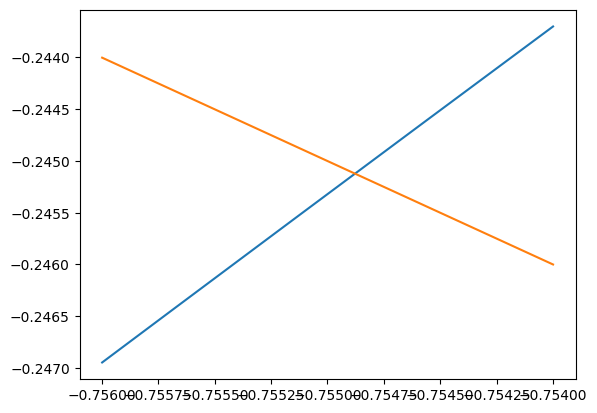

In [10]:
'''1 correct'''
start=-.754
end=-.756
plot(lambda x : x**5, start, end)
plot(lambda x : -x-1, start, end)

In [13]:
'''problem 2'''
prob2=lambda lim, numpoints: generate_axis(-lim,lim,numpoints)


prob2(10,100)











array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [14]:
prob3=lambda lim, numpoints: generate_axis(lim*2,lim*3,numpoints)

prob3(3,100)

array([6.  , 6.03, 6.06, 6.09, 6.12, 6.15, 6.18, 6.21, 6.24, 6.27, 6.3 ,
       6.33, 6.36, 6.39, 6.42, 6.45, 6.48, 6.51, 6.54, 6.57, 6.6 , 6.63,
       6.66, 6.69, 6.72, 6.75, 6.78, 6.81, 6.84, 6.87, 6.9 , 6.93, 6.96,
       6.99, 7.02, 7.05, 7.08, 7.11, 7.14, 7.17, 7.2 , 7.23, 7.26, 7.29,
       7.32, 7.35, 7.38, 7.41, 7.44, 7.47, 7.5 , 7.53, 7.56, 7.59, 7.62,
       7.65, 7.68, 7.71, 7.74, 7.77, 7.8 , 7.83, 7.86, 7.89, 7.92, 7.95,
       7.98, 8.01, 8.04, 8.07, 8.1 , 8.13, 8.16, 8.19, 8.22, 8.25, 8.28,
       8.31, 8.34, 8.37, 8.4 , 8.43, 8.46, 8.49, 8.52, 8.55, 8.58, 8.61,
       8.64, 8.67, 8.7 , 8.73, 8.76, 8.79, 8.82, 8.85, 8.88, 8.91, 8.94,
       8.97, 9.  ])

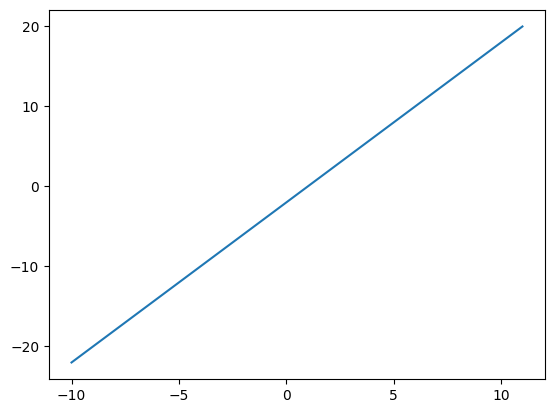

In [25]:
'''3'''
def home3(function,function2,start,end,numpoints=1000):
    toplot = lambda x : function(x)+function2(x)
    plot(toplot, start, end, numpoints)
                                                    #x_axis1 = generate_axis(start,end,numpoints)
                                                    #y_axis1 = np.array([function(xs)  for xs in x_axis1])
                                                    #x_axis2 = generate_axis(start,end,numpoints)
                                                    #y_axis2 = np.array([function2(xs)  for xs in x_axis2])
                                                    #plt.plot(x_axis1,y_axis1)
                                                    #plt.plot(x_axis2,y_axis2)
home3(lambda x : x,lambda x : x-2, -10, 11)
    

    

    
    


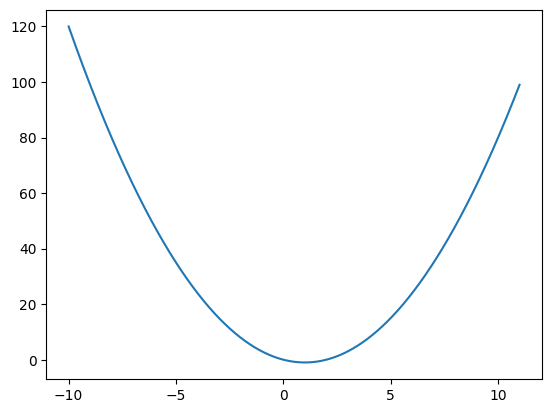

In [21]:
def practice(function,function2,start,end,numpoints=1000):
    toplot = lambda x : function(x)*function2(x)
    plot(toplot, start, end, numpoints)
practice(lambda x : x,lambda x : x-2, -10, 11)

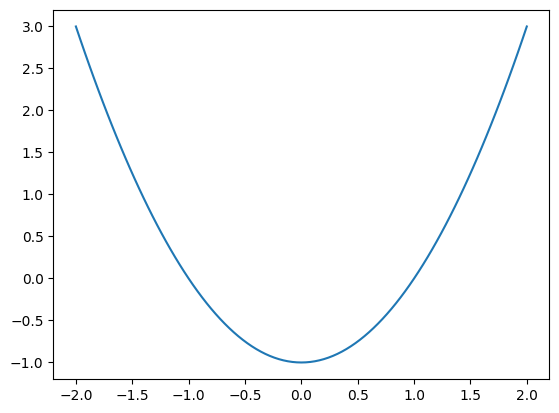

In [29]:
#idk
'''homework = lambda x : x**2-1

num_points = 100
start = -2
end   = 2

x_axis  = [ start + (end-start)*float(i)/num_points for i in range(num_points+1) ]
y_axis = [ homework(xs) for xs in x_axis ]
plt.plot(x_axis,y_axis)
plt.show()'''


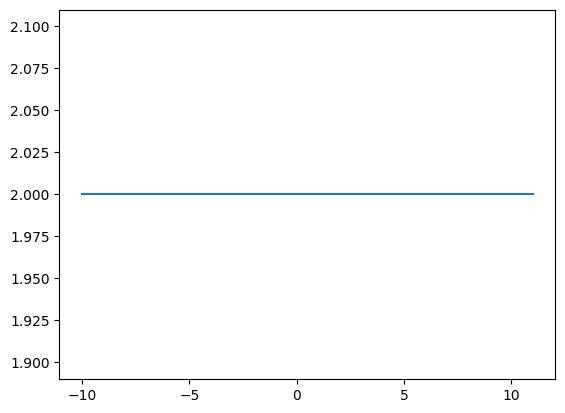

In [23]:
'''4'''
def home4(function,function2,start,end,numpoints=1000):
    toplot = lambda x : function(x)-function2(x)
    plot(toplot, start, end, numpoints)
home4(lambda x : x,lambda x : x-2, -10, 11)

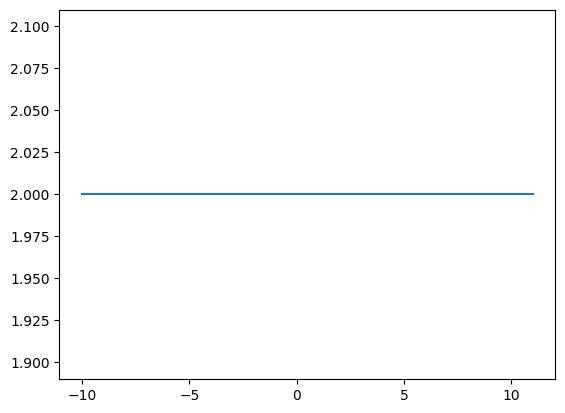

In [28]:
'''5'''
def practice(function,function2,start,end,operation,numpoints=1000):
    if operation=="+": 
        home3(function,function2,start,end,numpoints)
    elif operation=="-":
        home4(function,function2,start,end,numpoints)
practice(lambda x : x,lambda x : x-2, -10, 11,"-")
